In [1]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#Import excel files"
excel_path_2017 = "Resources/state_M2017_dl.xlsx"
excel_path_2016 = "Resources/state_M2016_dl.xlsx"
excel_path_2015 = "Resources/state_M2015_dl.xlsx"
excel_path_2014 = "Resources/state_M2014_dl.xlsx"
excel_path_2013 = "Resources/state_M2013_dl.xlsx"


In [2]:
#read the excel files
state17_df = pd.read_excel(excel_path_2017, index_col=None)
state16_df = pd.read_excel(excel_path_2016, index_col=None)
state15_df = pd.read_excel(excel_path_2015, index_col=None)
state14_df = pd.read_excel(excel_path_2014, index_col=None)
state13_df = pd.read_excel(excel_path_2013, index_col=None)
state13_df.head()

,AREA,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC_Q,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,1,AL,Alabama,00-0000,All Occupations,total,1844080,0.4,1000,1,...,14.61,23.64,35.4,17200,20010,30390,49180,73620,NaN,NaN
1,1,AL,Alabama,11-0000,Management Occupations,major,66820,1.1,36.233,0.73,...,44.53,61.52,86.05,51190,68650,92610,127970,178980,NaN,NaN
2,1,AL,Alabama,11-1011,Chief Executives,detailed,1300,11.1,0.705,0.38,...,83.98,#,#,87940,117790,174690,#,#,NaN,NaN
3,1,AL,Alabama,11-1021,General and Operations Managers,detailed,26490,1.7,14.364,0.96,...,49.06,71.18,#,58470,74340,102050,148050,#,NaN,NaN
4,1,AL,Alabama,11-1031,Legislators,detailed,1400,9.8,0.76,1.81,...,*,*,*,16110,17010,18510,21340,36190,True,NaN


In [3]:
#create list of computer and math occupations
comp_math = ['00-0000','15-0000','15-1121','15-1122','15-1131',
            '15-1132','15-1133','15-1134','15-1141',
            '15-1142','15-1143','15-1151','15-1152',
            '15-1199','15-2031','15-2041']

In [4]:
#trim data frame to math and computer occupations only
com_math_17_df = state17_df.loc[state17_df['OCC_CODE'].isin(comp_math)]
com_math_16_df = state16_df.loc[state16_df['OCC_CODE'].isin(comp_math)]
com_math_15_df = state15_df.loc[state15_df['OCC_CODE'].isin(comp_math)]
com_math_14_df = state14_df.loc[state14_df['OCC_CODE'].isin(comp_math)]
com_math_13_df = state13_df.loc[state13_df['OCC_CODE'].isin(comp_math)]
len(com_math_17_df)

840

In [5]:
com_math_17_df = com_math_17_df.drop(['AREA','ANNUAL','HOURLY'], axis=1)
com_math_16_df = com_math_16_df.drop(['AREA','ANNUAL','HOURLY'], axis=1)
com_math_15_df = com_math_15_df.drop(['AREA','ANNUAL','HOURLY'], axis=1)
com_math_14_df = com_math_14_df.drop(['AREA','ANNUAL','HOURLY'], axis=1)
com_math_13_df = com_math_13_df.drop(['AREA','ANNUAL','HOURLY'], axis=1)


In [6]:
# emp_count_17=com_math_17_df['TOT_EMP']
# allyears_empcount=pd.DataFrame(com_math_17_df['ST'],com_math_17_df['STATE'],
#                                com_math_17_df['OCC_CODE'], com_math_17_df['OCC_TITLE'],
#                               com_math_17_df['OCC_GROUP'], axis=1)
# allyears_empcount

In [7]:
#merge in 2016 and check with len()
state_17_16_merge = pd.merge(
    com_math_17_df, state16_df, on=['ST', 'STATE', 'OCC_CODE'], how="left",
    suffixes=("_17", "_16"))
len(state_17_16_merge)
# len(state16_df)
# com_math_17_df.groupby('OCC_CODE').count()
# state_17_16_merge.columns

840

In [8]:
#merge in 2015 and check with len()
state_17_16_15_merge = pd.merge(
    state_17_16_merge, state15_df, on=['ST', 'STATE', 'OCC_CODE'], how="left",suffixes=("", "_15"))
len(state_17_16_15_merge)
# state_17_16_15_merge.columns


840

In [9]:
#merge in 2014 and check with len()
state_17_16_15_14_merge = pd.merge(
    state_17_16_15_merge, state14_df, on=['ST', 'STATE', 'OCC_CODE'], how="left",suffixes=("", "_14"))
len(state_17_16_15_14_merge)
# state_17_16_15_14_merge.columns

840

In [10]:
#merge in 2013 and check with len()
allyears_df = pd.merge(
    state_17_16_15_14_merge, state13_df, on=['ST', 'STATE', 'OCC_CODE'], 
    how="left",suffixes=("", "_13"))
len(allyears_df)
allyears_df=allyears_df.replace('NaN', np.nan)

allyears_df.head(3)



,ST,STATE,OCC_CODE,OCC_TITLE_17,OCC_GROUP_17,TOT_EMP_17,m,JOBS_1000_17,LOC_Q_17,H_MEAN_17,...,H_MEDIAN_13,H_PCT75_13,H_PCT90_13,A_PCT10_13,A_PCT25_13,A_MEDIAN_13,A_PCT75_13,A_PCT90_13,ANNUAL_13,HOURLY_13
0,AL,Alabama,00-0000,All Occupations,total,1922570,0.4,1000,1,20.76,...,14.61,23.64,35.4,17200,20010,30390,49180,73620,NaN,NaN
1,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,39760,2.3,20.68,0.69,39.36,...,34.18,44.57,55.81,37060,50890,71100,92710,116090,NaN,NaN
2,AL,Alabama,15-1121,Computer Systems Analysts,detailed,4010,9.4,2.084,0.51,39.41,...,37.15,45.38,55.26,49040,61700,77260,94390,114950,NaN,NaN


In [11]:
#trying to convert all strings to values
# for column in allyears_df
#     allyears_df[column]
    
# allyear_emp_count['TOT_EMP_13']= pd.to_numeric(allyear_emp_count['TOT_EMP_13'], errors='coerce')


In [12]:
#view columns 
# allyears_df.columns

#view types
# allyear_emp_count.isna()
# allyear_emp_count.dtypes

In [13]:
# Index(['AREA', 'ST', 'STATE', 'OCC_CODE', 'OCC_TITLE', 'OCC_GROUP', 'TOT_EMP',
#        'm', 'JOBS_1000', 'LOC_Q', 'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10',
#        'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25',
#        'A_MEDIAN', 'A_PCT75', 'A_PCT90', 'ANNUAL', 'HOURLY'],
#       dtype='object')

In [14]:
allyear_emp_count=pd.DataFrame({
    'ST':allyears_df['ST'],
    'STATE':allyears_df['STATE'],
    'OCC_CODE':allyears_df['OCC_CODE'],
    'OCC_TITLE':allyears_df['OCC_TITLE_17'],
    'OCC_GROUP':allyears_df['OCC_GROUP_17'],
    'TOT_EMP_13':allyears_df['TOT_EMP_13'],
    'TOT_EMP_14':allyears_df['TOT_EMP_14'],
    'TOT_EMP_15':allyears_df['TOT_EMP'],
    'TOT_EMP_16':allyears_df['TOT_EMP_16'],
    'TOT_EMP_17':allyears_df['TOT_EMP_17']})

allyear_emp_count['TOT_EMP_13']= pd.to_numeric(allyear_emp_count['TOT_EMP_13'], errors='coerce')
allyear_emp_count['TOT_EMP_14']= pd.to_numeric(allyear_emp_count['TOT_EMP_14'], errors='coerce')
allyear_emp_count['TOT_EMP_15']= pd.to_numeric(allyear_emp_count['TOT_EMP_15'], errors='coerce')
allyear_emp_count['TOT_EMP_16']= pd.to_numeric(allyear_emp_count['TOT_EMP_16'], errors='coerce')
allyear_emp_count['TOT_EMP_17']= pd.to_numeric(allyear_emp_count['TOT_EMP_17'], errors='coerce')
allyear_emp_count.head()


,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP_13,TOT_EMP_14,TOT_EMP_15,TOT_EMP_16,TOT_EMP_17
0,AL,Alabama,00-0000,All Occupations,total,1844080.0,1857530.0,1883310.0,1912990.0,1922570.0
1,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,40350.0,39420.0,38260.0,38600.0,39760.0
2,AL,Alabama,15-1121,Computer Systems Analysts,detailed,5770.0,6110.0,4170.0,4020.0,4010.0
3,AL,Alabama,15-1122,Information Security Analysts,detailed,1820.0,1270.0,1170.0,970.0,1100.0
4,AL,Alabama,15-1131,Computer Programmers,detailed,5260.0,5550.0,5850.0,6590.0,7420.0


In [15]:
#data frame for percentage change per year
percentage_count_change_14=(allyear_emp_count['TOT_EMP_14']-allyear_emp_count['TOT_EMP_13'])/allyear_emp_count['TOT_EMP_13']*100
percentage_count_change_15=(allyear_emp_count['TOT_EMP_15']-allyear_emp_count['TOT_EMP_14'])/allyear_emp_count['TOT_EMP_14']*100
percentage_count_change_16=(allyear_emp_count['TOT_EMP_16']-allyear_emp_count['TOT_EMP_15'])/allyear_emp_count['TOT_EMP_15']*100
percentage_count_change_17=(allyear_emp_count['TOT_EMP_17']-allyear_emp_count['TOT_EMP_16'])/allyear_emp_count['TOT_EMP_16']*100
percentage_count_change_13to17=(allyear_emp_count['TOT_EMP_17']-allyear_emp_count['TOT_EMP_13'])/allyear_emp_count['TOT_EMP_13']*100
percentage_count_change_avg=(percentage_count_change_14+percentage_count_change_15+percentage_count_change_16+percentage_count_change_17)/4

allyear_emp_percent_count_change_df=pd.DataFrame({
    'ST':allyears_df['ST'],
    'STATE':allyears_df['STATE'],
    'OCC_CODE':allyears_df['OCC_CODE'],
    'OCC_TITLE':allyears_df['OCC_TITLE_17'],
    'OCC_GROUP':allyears_df['OCC_GROUP_17'],
    '% Change 2014':percentage_count_change_14,
    '% Change 2015':percentage_count_change_15,
    '% Change 2016':percentage_count_change_16,
    '% Change 2017':percentage_count_change_17,
    'Avg. % Change':percentage_count_change_avg,
    '% Change 2013 to 2017':percentage_count_change_13to17})
allyear_emp_percent_count_change_df.head(3)


,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2014,% Change 2015,% Change 2016,% Change 2017,Avg. % Change,% Change 2013 to 2017
0,AL,Alabama,00-0000,All Occupations,total,0.729361,1.387865,1.575949,0.500787,1.048490,4.256323
1,AL,Alabama,15-0000,Computer and Mathematical Occupations,major,-2.304833,-2.942669,0.888657,3.005181,-0.338416,-1.462206
2,AL,Alabama,15-1121,Computer Systems Analysts,detailed,5.892548,-31.751227,-3.597122,-0.248756,-7.426140,-30.502600


In [16]:
top_five_2014 = allyear_emp_percent_count_change_df.sort_values('% Change 2014', ascending=False)
top_five_2014 = top_five_2014.drop(['% Change 2015','% Change 2016','% Change 2017','% Change 2013 to 2017'], axis=1)
top_five_2014.head(5)

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2014,Avg. % Change
300,LA,Louisiana,15-2031,Operations Research Analysts,detailed,133.333333,20.082237
269,KS,Kansas,15-2041,Statisticians,detailed,100.000000,11.992441
657,SD,South Dakota,15-1122,Information Security Analysts,detailed,87.500000,33.839286
420,MT,Montana,15-1133,"Software Developers, Systems Software",detailed,80.645161,21.159531
220,IL,Illinois,15-2031,Operations Research Analysts,detailed,75.235110,23.882589


In [17]:
top_five_2015 = allyear_emp_percent_count_change_df.sort_values('% Change 2015', ascending=False)
top_five_2015 = top_five_2015.drop(['% Change 2014','% Change 2016','% Change 2017','% Change 2013 to 2017'], axis=1)
top_five_2015.head(5)

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2015,Avg. % Change
19,AK,Alaska,15-1122,Information Security Analysts,detailed,80.000000,14.097222
546,ND,North Dakota,15-1131,Computer Programmers,detailed,76.923077,24.907495
115,DE,Delaware,15-1122,Information Security Analysts,detailed,75.000000,23.454914
429,MT,Montana,15-2041,Statisticians,detailed,75.000000,-3.214286
572,OH,Ohio,15-2031,Operations Research Analysts,detailed,67.804878,17.596150


In [18]:
top_five_2016 = allyear_emp_percent_count_change_df.sort_values('% Change 2016', ascending=False)
top_five_2016 = top_five_2016.drop(['% Change 2015','% Change 2014','% Change 2017','% Change 2013 to 2017'], axis=1)
top_five_2016.head(5)

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2016,Avg. % Change
824,PR,Puerto Rico,15-1133,"Software Developers, Systems Software",detailed,137.500000,36.835940
62,AR,Arkansas,15-2031,Operations Research Analysts,detailed,96.428571,24.864719
369,MN,Minnesota,15-1122,Information Security Analysts,detailed,87.368421,25.315602
182,HI,Hawaii,15-1141,Database Administrators,detailed,73.333333,15.430315
171,GA,Georgia,15-1199,"Computer Occupations, All Other",detailed,71.794872,39.333316


In [19]:
top_five_2017 = allyear_emp_percent_count_change_df.sort_values('% Change 2017', ascending=False)
top_five_2017 = top_five_2017.drop(['% Change 2015','% Change 2016','% Change 2014','% Change 2013 to 2017'], axis=1)
top_five_2017.head(5)

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2017,Avg. % Change
63,AR,Arkansas,15-2041,Statisticians,detailed,117.647059,36.453889
730,VT,Vermont,15-1199,"Computer Occupations, All Other",detailed,111.111111,21.432190
443,NE,Nebraska,15-1199,"Computer Occupations, All Other",detailed,76.086957,39.497375
53,AR,Arkansas,15-1132,"Software Developers, Applications",detailed,74.056604,19.687552
839,VI,Virgin Islands,15-1152,Computer Network Support Specialists,detailed,66.666667,NaN


In [20]:
top_five_overall = allyear_emp_percent_count_change_df.sort_values('% Change 2013 to 2017', ascending=False)
top_five_overall = top_five_overall.drop(['% Change 2015','% Change 2016','% Change 2014','% Change 2017'], axis=1)

top_five_overall.head(5)

,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,Avg. % Change,% Change 2013 to 2017
444,NE,Nebraska,15-2031,Operations Research Analysts,detailed,46.160098,354.545455
221,IL,Illinois,15-2041,Statisticians,detailed,39.723877,273.170732
171,GA,Georgia,15-1199,"Computer Occupations, All Other",detailed,39.333316,258.874459
443,NE,Nebraska,15-1199,"Computer Occupations, All Other",detailed,39.497375,247.142857
714,UT,Utah,15-1199,"Computer Occupations, All Other",detailed,31.688586,197.126437


In [21]:
top_five_avg = allyear_emp_percent_count_change_df.sort_values('Avg. % Change', ascending=False)
top_five_avg = top_five_avg.drop(['% Change 2015','% Change 2016','% Change 2014','% Change 2017', '% Change 2013 to 2017'], axis=1)
top_five_avg.head(5)


,ST,STATE,OCC_CODE,OCC_TITLE,OCC_GROUP,Avg. % Change
444,NE,Nebraska,15-2031,Operations Research Analysts,detailed,46.160098
221,IL,Illinois,15-2041,Statisticians,detailed,39.723877
443,NE,Nebraska,15-1199,"Computer Occupations, All Other",detailed,39.497375
171,GA,Georgia,15-1199,"Computer Occupations, All Other",detailed,39.333316
824,PR,Puerto Rico,15-1133,"Software Developers, Systems Software",detailed,36.835940


In [22]:
state_totals = allyear_emp_count.groupby(["STATE"]).sum()["TOT_EMP_13"]
state_totals.head()


STATE
Alabama        1924420.0
Alaska          333000.0
Arizona        2627100.0
Arkansas       1193370.0
California    15678090.0
Name: TOT_EMP_13, dtype: float64

In [23]:
# by_state_empcount=pd.DataFrame({
#     'ST':allyears_df['ST'].groupby(["STATE"]),
#     'STATE':allyears_df['STATE'].groupby(["STATE"]),
#     'OCC_CODE':allyears_df['OCC_CODE'].groupby(["STATE"]),
#     'OCC_TITLE':allyears_df['OCC_TITLE_17'].groupby(["STATE"]),
#     'OCC_GROUP':allyears_df['OCC_GROUP_17'].groupby(["STATE"]),
#     'TOT_EMP_13':allyears_df['TOT_EMP_13'].groupby(["STATE"]).mean()["TOT_EMP_13"],
#     'TOT_EMP_14':allyears_df['TOT_EMP_14'].groupby(["STATE"]).mean()["TOT_EMP_14"],
#     'TOT_EMP_15':allyears_df['TOT_EMP'].groupby(["STATE"]).mean()["TOT_EMP_15"],
#     'TOT_EMP_16':allyears_df['TOT_EMP_16'].groupby(["STATE"]).mean()["TOT_EMP_16"],
#     'TOT_EMP_17':allyears_df['TOT_EMP_17'].groupby(["STATE"]).mean()["TOT_EMP_17"]
# })




In [24]:
title_summation = allyear_emp_count.groupby(["OCC_CODE", "OCC_TITLE"])[['TOT_EMP_13', 'TOT_EMP_14', 'TOT_EMP_15', 'TOT_EMP_16', 'TOT_EMP_17']].sum().reset_index()
title_summation.head()

,OCC_CODE,OCC_TITLE,TOT_EMP_13,TOT_EMP_14,TOT_EMP_15,TOT_EMP_16,TOT_EMP_17
0,00-0000,All Occupations,133614660.0,136129200.0,138885360.0,141382280.0,143524090.0
1,15-0000,Computer and Mathematical Occupations,3706450.0,3844270.0,4015550.0,4176390.0,4273060.0
2,15-1121,Computer Systems Analysts,507770.0,529440.0,557670.0,570190.0,583230.0
3,15-1122,Information Security Analysts,78180.0,80400.0,89110.0,95480.0,105570.0
4,15-1131,Computer Programmers,313680.0,303400.0,290670.0,272650.0,242140.0


In [287]:
percentage_title_14=(title_summation['TOT_EMP_14']-title_summation['TOT_EMP_13'])/title_summation['TOT_EMP_13']*100
percentage_title_15=(title_summation['TOT_EMP_15']-title_summation['TOT_EMP_14'])/title_summation['TOT_EMP_14']*100
percentage_title_16=(title_summation['TOT_EMP_16']-title_summation['TOT_EMP_15'])/title_summation['TOT_EMP_15']*100
percentage_title_17=(title_summation['TOT_EMP_17']-title_summation['TOT_EMP_16'])/title_summation['TOT_EMP_16']*100
percentage_title_13to17=(title_summation['TOT_EMP_17']-title_summation['TOT_EMP_13'])/title_summation['TOT_EMP_13']*100
percentage_title_avg=(percentage_title_14+percentage_title_15+percentage_title_16+percentage_title_17)/4

allyear_emp_percent_title_df=pd.DataFrame({
    'OCC_CODE':allyears_df['OCC_CODE'],
    'OCC_TITLE':allyears_df['OCC_TITLE_17'],
    'OCC_GROUP':allyears_df['OCC_GROUP_17'],
    '% Change 2014':percentage_title_14,
    '% Change 2015':percentage_title_15,
    '% Change 2016':percentage_title_16,
    '% Change 2017':percentage_title_17,
    'Avg. % Change':percentage_title_avg,
    '% Change 2013 to 2017':percentage_title_13to17})

allyear_emp_percent_title_df.head(3)

top_title = allyear_emp_percent_title_df.sort_values('% Change 2017', ascending=False)
top_title

,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2014,% Change 2015,% Change 2016,% Change 2017,Avg. % Change,% Change 2013 to 2017
13,15-1199,"Computer Occupations, All Other",detailed,8.160879,1.635953,20.948196,17.648858,12.098472,56.424467
3,15-1122,Information Security Analysts,detailed,2.839601,10.833333,7.148468,10.567658,7.847265,35.034536
15,15-2041,Statisticians,detailed,7.910507,10.403554,12.105969,7.627879,9.511977,43.747503
5,15-1132,"Software Developers, Applications",detailed,6.644415,8.603246,6.484820,6.926979,7.164865,31.873011
1,15-0000,Computer and Mathematical Occupations,major,3.718383,4.455462,4.005429,2.314678,3.623488,15.287135
2,15-1121,Computer Systems Analysts,detailed,4.267680,5.332049,2.245055,2.286957,3.532935,14.861059
11,15-1151,Computer User Support Specialists,detailed,4.107199,3.798719,3.029067,1.852768,3.196938,13.397990
0,00-0000,All Occupations,total,1.881934,2.024665,1.797828,1.514907,1.804834,7.416424
10,15-1143,Computer Network Architects,detailed,-0.910503,4.751051,7.207942,0.507421,2.888978,11.843591
8,15-1141,Database Administrators,detailed,-2.350390,1.438849,0.000000,-0.061291,-0.243208,-1.006071


In [288]:
top_title = allyear_emp_percent_title_df.sort_values('% Change 2017', ascending=False).reset_index()
top_title = top_title.dropna()

top_five = top_title.iloc[0:3, :] 
bottom_five = top_title.iloc[-3:, :]
all_comp_math = top_title.loc[top_title['OCC_TITLE']== 'Computer and Mathematical Occupations']
all_jobs = top_title.loc[top_title['OCC_TITLE']== 'All Occupations']

frames = [top_five, bottom_five, all_comp_math, all_jobs]

result = pd.concat(frames)
result


,index,OCC_CODE,OCC_TITLE,OCC_GROUP,% Change 2014,% Change 2015,% Change 2016,% Change 2017,Avg. % Change,% Change 2013 to 2017
0,13,15-1199,"Computer Occupations, All Other",detailed,8.160879,1.635953,20.948196,17.648858,12.098472,56.424467
1,3,15-1122,Information Security Analysts,detailed,2.839601,10.833333,7.148468,10.567658,7.847265,35.034536
2,15,15-2041,Statisticians,detailed,7.910507,10.403554,12.105969,7.627879,9.511977,43.747503
13,7,15-1134,Web Developers,detailed,7.297848,4.985555,2.020599,-2.859125,2.861219,11.637587
14,6,15-1133,"Software Developers, Systems Software",detailed,1.642019,2.123293,5.297058,-3.481771,1.395149,5.493007
15,4,15-1131,Computer Programmers,detailed,-3.277225,-4.195781,-6.199470,-11.190171,-6.215662,-22.806682
4,1,15-0000,Computer and Mathematical Occupations,major,3.718383,4.455462,4.005429,2.314678,3.623488,15.287135
7,0,00-0000,All Occupations,total,1.881934,2.024665,1.797828,1.514907,1.804834,7.416424


In [286]:
result = result.drop(['OCC_CODE', 'OCC_GROUP', 'Avg. % Change', '% Change 2013 to 2017', 'index'], axis=1).reset_index(drop=True)
result_pivot = result.set_index('OCC_TITLE').T
result_pivot

OCC_TITLE,"Computer Occupations, All Other",Information Security Analysts,Statisticians,Web Developers,"Software Developers, Systems Software",Computer Programmers,Computer and Mathematical Occupations,All Occupations
% Change 2014,8.160879,2.839601,7.910507,7.297848,1.642019,-3.277225,3.718383,1.881934
% Change 2015,1.635953,10.833333,10.403554,4.985555,2.123293,-4.195781,4.455462,2.024665
% Change 2016,20.948196,7.148468,12.105969,2.020599,5.297058,-6.199470,4.005429,1.797828
% Change 2017,17.648858,10.567658,7.627879,-2.859125,-3.481771,-11.190171,2.314678,1.514907


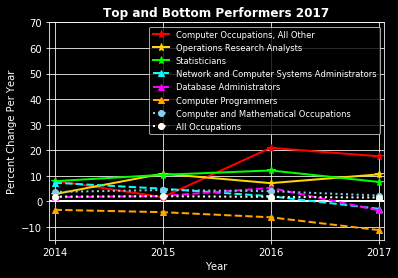

In [283]:
# Generate the Plot (with Error Bars)
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

fig = plt.figure()
# ax = plt.axes(projection='3d')

plt.plot(years,  result_pivot["Computer Occupations, All Other"], 
         label="Computer Occupations, All Other", 
         color="r", marker='*', linewidth=2, markersize=8)
plt.plot(years, result_pivot["Information Security Analysts"], 
         label="Operations Research Analysts",
         color="gold", marker='*', linewidth=2, markersize=8)
plt.plot(years, result_pivot["Statisticians"], 
         label="Statisticians",
         color="lime", marker='*', linewidth=2, markersize=8)

plt.plot(years, result_pivot["Web Developers"], 
         label="Network and Computer Systems Administrators",
         color="cyan", marker='^', linewidth=2, linestyle='dashed')
plt.plot(years, result_pivot["Software Developers, Systems Software"], 
         label="Database Administrators",
         color="magenta", marker='^', linewidth=2, linestyle='dashed')
plt.plot(years, result_pivot["Computer Programmers"], 
         label="Computer Programmers",
         color="orange", marker='^', linewidth=2, linestyle='dashed')

plt.plot(years, result_pivot["Computer and Mathematical Occupations"], 
         label= "Computer and Mathematical Occupations",
         color="skyblue", marker='o', linewidth=2, linestyle=':')
plt.plot(years, result_pivot["All Occupations"],
         label= "All Occupations", marker='o',
         color="ivory", linewidth=2, linestyle=':')

plt.hlines(0, 2013.95,2017.05,colors='white',linewidth=2)
plt.grid()
plt.title("Top and Bottom Performers 2017", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Percent Change Per Year")
plt.legend(loc='best', fontsize="small", fancybox=True)
# plt.legend(loc=(.15, -0.75), fontsize="small", fancybox=True)

plt.xlim(2013.95,2017.05)
plt.ylim(-15,70)
plt.xticks(np.arange(2014, 2018, step=1))
plt.style.use('dark_background')
plt.savefig("images/occupation_change_summary.png")

plt.show()

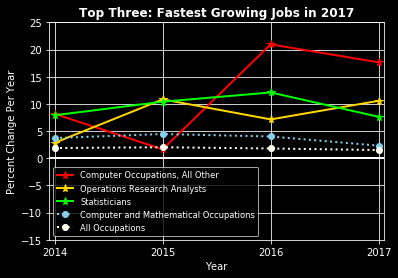

In [269]:

fig = plt.figure()


plt.plot(years,  result_pivot["Computer Occupations, All Other"], 
         label="Computer Occupations, All Other", 
         color="r", marker='*', linewidth=2, markersize=8)
plt.plot(years, result_pivot["Information Security Analysts"], 
         label="Operations Research Analysts",
         color="gold", marker='*', linewidth=2, markersize=8)
plt.plot(years, result_pivot["Statisticians"], 
         label="Statisticians",
         color="lime", marker='*', linewidth=2, markersize=8)

plt.plot(years, result_pivot["Computer and Mathematical Occupations"], 
         label= "Computer and Mathematical Occupations",
         color="skyblue", marker='o', linewidth=2, linestyle=':')
plt.plot(years, result_pivot["All Occupations"],
         label= "All Occupations", marker='o',
         color="ivory", linewidth=2, linestyle=':')

plt.hlines(0, 2013.95,2017.05,colors='white',linewidth=2)
plt.grid()
plt.title("Top Three: Fastest Growing Jobs in 2017", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Percent Change Per Year")
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.xlim(2013.95,2017.05)
plt.ylim(-15,25)
plt.xticks(np.arange(2014, 2018, step=1))
plt.style.use('dark_background')
plt.savefig("images/top_three_jobs.png")

plt.show()


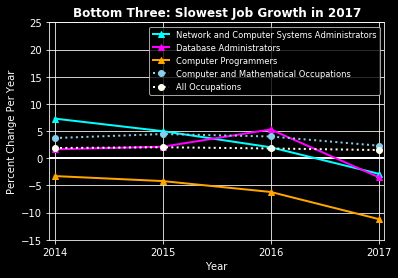

In [270]:
# Generate the Plot (with Error Bars)
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

fig = plt.figure()

plt.plot(years, result_pivot["Web Developers"], 
         label="Network and Computer Systems Administrators",
         color="cyan", marker='^', linewidth=2)
plt.plot(years, result_pivot["Software Developers, Systems Software"], 
         label="Database Administrators",
         color="magenta", marker='^', linewidth=2)
plt.plot(years, result_pivot["Computer Programmers"], 
         label="Computer Programmers",
         color="orange", marker='^', linewidth=2)

plt.plot(years, result_pivot["Computer and Mathematical Occupations"], 
         label= "Computer and Mathematical Occupations",
         color="skyblue", marker='o', linewidth=2, linestyle=':')
plt.plot(years, result_pivot["All Occupations"],
         label= "All Occupations", marker='o',
         color="ivory", linewidth=2, linestyle=':')

plt.hlines(0, 2013.95,2017.05,colors='white',linewidth=2)
plt.grid()
plt.title("Bottom Three: Slowest Job Growth in 2017", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Percent Change Per Year")
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.xlim(2013.95,2017.05)
plt.ylim(-15,25)
plt.xticks(np.arange(2014, 2018, step=1))
plt.style.use('dark_background')
plt.savefig("images/bottom_three_jobs.png")

plt.show()

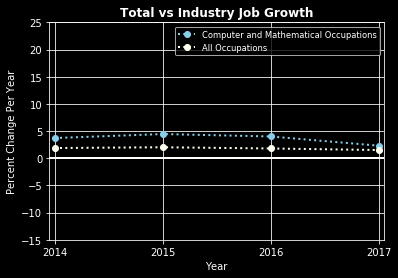

In [272]:

plt.plot(years, result_pivot["Computer and Mathematical Occupations"], 
         label= "Computer and Mathematical Occupations",
         color="skyblue", marker='o', linewidth=2, linestyle=':')
plt.plot(years, result_pivot["All Occupations"],
         label= "All Occupations", marker='o',
         color="ivory", linewidth=2, linestyle=':')
plt.hlines(0, 2013.95,2017.05,colors='white',linewidth=2)
plt.grid()
plt.title("Total vs Industry Job Growth", fontweight='bold')
plt.xlabel("Year")
plt.ylabel("Percent Change Per Year")
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.xlim(2013.95,2017.05)
plt.ylim(-15,25)
plt.xticks(np.arange(2014, 2018, step=1))
plt.style.use('dark_background')
plt.savefig("images/major_jobs.png")

plt.show()